In [1]:
import pandas as pd
import numpy as np
import json
import re
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch
import seaborn as sns
import matplotlib.patches as mpatches
pd.set_option('display.max_columns', None)
from highlight_text import fig_text
#Set general use colors
text_color = 'w'

In [2]:
i=np.arange(1396,1401)
i

array([1396, 1397, 1398, 1399, 1400])

In [3]:
def extract_json_from_html(html_path, save_output=False):
    html_file = open(html_path, 'r',encoding='utf8')
    html = html_file.read()
    html_file.close()
    regex_pattern = r'(?<=require\.config\.params\["args"\].=.)[\s\S]*?;'
    data_txt = re.findall(regex_pattern, html)[0]

    # add quotations for json parser
    data_txt = data_txt.replace('matchId', '"matchId"')
    data_txt = data_txt.replace('matchCentreData', '"matchCentreData"')
    data_txt = data_txt.replace('matchCentreEventTypeJson', '"matchCentreEventTypeJson"')
    data_txt = data_txt.replace('formationIdNameMappings', '"formationIdNameMappings"')
    data_txt = data_txt.replace('};', '}')
    for k in i:
        data_txt=data_txt.replace('\n</td></tr><tr><td class="line-number" value="'+ str(k) +'"></td><td class="line-content">',' ')
    if save_output:
        # save json data to txt
        output_file = open(f"{html_path}.txt", "wt")
        n = output_file.write(data_txt)
        output_file.close()

    return data_txt

In [4]:
def extract_data_from_dict(data):
    # load data from json
    event_types_json = data["matchCentreEventTypeJson"]
    formation_mappings = data["formationIdNameMappings"]
    events_dict = data["matchCentreData"]["events"]
    teams_dict = {data["matchCentreData"]['home']['teamId']: data["matchCentreData"]['home']['name'],
                  data["matchCentreData"]['away']['teamId']: data["matchCentreData"]['away']['name']}
    players_dict = data["matchCentreData"]["playerIdNameDictionary"]
    # create players dataframe
    players_home_df = pd.DataFrame(data["matchCentreData"]['home']['players'])
    players_home_df["teamId"] = data["matchCentreData"]['home']['teamId']
    players_away_df = pd.DataFrame(data["matchCentreData"]['away']['players'])
    players_away_df["teamId"] = data["matchCentreData"]['away']['teamId']
    players_df = pd.concat([players_home_df, players_away_df])
    players_ids = data["matchCentreData"]["playerIdNameDictionary"]
    return events_dict, players_df, teams_dict

In [5]:
match_html_path = 'matches/EngFra.html'
json_data_txt = extract_json_from_html(match_html_path)
data = json.loads(json_data_txt)
events_dict, players_df, teams_dict = extract_data_from_dict(data)

In [6]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,110189,1,Jordan Pickford,GK,185,82,28,True,False,home,"{'totalSaves': {'10': 1.0, '59': 1.0, '81': 1....",NaN,NaN,NaN,NaN,NaN,NaN,345
1,69778,2,Kyle Walker,DR,178,80,32,True,False,home,"{'possession': {'6': 1.0, '11': 1.0, '13': 3.0...",NaN,NaN,NaN,NaN,NaN,NaN,345
2,99487,6,Harry Maguire,DC,194,90,29,True,False,home,"{'possession': {'0': 1.0, '1': 2.0, '4': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
3,101374,5,John Stones,DC,188,80,28,True,False,home,"{'possession': {'0': 1.0, '1': 1.0, '7': 2.0, ...",113069.0,"{'value': 15, 'displayName': 'PreGame'}",102.0,NaN,NaN,NaN,345
4,118244,3,Luke Shaw,DL,185,75,27,True,False,home,"{'possession': {'0': 1.0, '1': 2.0, '3': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
5,68659,8,Jordan Henderson,MC,182,78,32,True,False,home,"{'possession': {'3': 1.0, '7': 2.0, '13': 2.0,...",343346.0,"{'value': 2, 'displayName': 'SecondHalf'}",83.0,NaN,NaN,NaN,345
6,332325,4,Declan Rice,MC,185,84,23,True,False,home,"{'possession': {'0': 1.0, '1': 1.0, '2': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
7,379868,22,Jude Bellingham,MC,186,75,19,True,False,home,"{'possession': {'0': 1.0, '4': 2.0, '6': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
8,367185,17,Bukayo Saka,FWR,178,72,21,True,False,home,"{'possession': {'2': 1.0, '18': 1.0, '21': 1.0...",97692.0,"{'value': 2, 'displayName': 'SecondHalf'}",83.0,NaN,NaN,NaN,345
9,83532,9,Harry Kane,FW,188,86,29,True,False,home,"{'possession': {'2': 2.0, '3': 1.0, '13': 1.0,...",NaN,NaN,NaN,NaN,NaN,NaN,345


In [7]:
events_dict

[{'id': 2490213995.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 345,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2490213997.0,
  'eventId': 2,
  'minute': 0,
  'second': 0,
  'teamId': 341,
  'x': 0.0,
  'y': 0.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 32, 'displayName': 'Start'},
  'outcomeType': {'value': 1, 'displayName': 'Successful'},
  'qualifiers': [],
  'satisfiedEventsTypes': [],
  'isTouch': False},
 {'id': 2490214001.0,
  'eventId': 3,
  'minute': 0,
  'second': 0,
  'teamId': 341,
  'playerId': 80241,
  'x': 50.0,
  'y': 50.0,
  'expandedMinute': 0,
  'period': {'value': 1, 'displayName': 'FirstHalf'},
  'type': {'value': 1, 'displayName': 'Pass'},
  'outcomeTy

In [8]:
df = pd.DataFrame(events_dict)
df

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType
0,2.490214e+09,2,0,0.0,345,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.490214e+09,2,0,0.0,341,0.0,0.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 32, 'displayName': 'Start'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.490214e+09,3,0,0.0,341,50.0,50.0,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[91, 117, 30, 35, 38, 216, 218]",True,80241.0,35.9,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.490214e+09,4,0,2.0,341,37.3,46.6,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 120, 124, 128, 36, 37, 217, 218]",True,353423.0,72.1,82.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2.490214e+09,3,0,4.0,345,25.6,15.9,0,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 8, 'displayName': 'Interception'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 101, 56]",True,69778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2.490232e+09,860,100,30.0,345,0.0,0.0,105,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1452,2.490232e+09,733,0,0.0,341,0.0,0.0,15,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,2.490232e+09,862,0,0.0,345,0.0,0.0,15,"{'value': 14, 'displayName': 'PostGame'}","{'value': 30, 'displayName': 'End'}","{'value': 1, 'displayName': 'Successful'}",[],[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1454,2.490200e+09,1,0,0.0,345,0.0,0.0,0,"{'value': 16, 'displayName': 'PreMatch'}","{'value': 34, 'displayName': 'FormationSet'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 44, 'displayName': 'Player...",[],False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.columns

Index(['id', 'eventId', 'minute', 'second', 'teamId', 'x', 'y',
       'expandedMinute', 'period', 'type', 'outcomeType', 'qualifiers',
       'satisfiedEventsTypes', 'isTouch', 'playerId', 'endX', 'endY',
       'relatedEventId', 'relatedPlayerId', 'blockedX', 'blockedY',
       'goalMouthZ', 'goalMouthY', 'isShot', 'isGoal', 'cardType'],
      dtype='object')

In [10]:
df[df['minute']==16]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType
265,2.490217e+09,134,16,2.0,341,37.4,84.7,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 119, 117, 30, 36, 37, 216, 218]",True,327721.0,56.7,95.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,2.490217e+09,135,16,8.0,341,67.2,94.7,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 119, 117, 30, 35, 38, 216, 218]",True,300713.0,64.9,77.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,2.490217e+09,136,16,10.0,341,66.3,78.8,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 38, 217, 218]",True,327721.0,68.7,61.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
268,2.490217e+09,137,16,12.0,341,72.5,60.2,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 3, 'displayName': 'TakeOn'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 178, 'displayName': 'Stand...","[91, 54]",True,300713.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,2.490217e+09,155,16,12.0,345,27.5,39.8,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 45, 'displayName': 'Challenge'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 285, 'displayName': 'Defen...",[55],False,332325.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,2.490217e+09,138,16,14.0,341,73.9,41.9,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 140, 'displayName': 'PassE...","[91, 119, 117, 30, 205, 36, 38, 217, 218]",True,300713.0,82.7,17.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,2.490217e+09,139,16,18.0,341,87.0,24.3,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 212, 'displayName': 'Lengt...","[91, 119, 117, 30, 205, 35, 37, 217, 218]",True,299513.0,80.3,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,2.490217e+09,140,16,20.0,341,80.3,28.5,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 1, 'displayName': 'Pass'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 141, 'displayName': 'PassE...","[91, 92, 119, 117, 30, 123, 205, 40, 46, 52, 3...",True,80241.0,74.8,46.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,2.490217e+09,141,16,23.0,341,73.9,46.6,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 24, 9, 10, 2, 3, 12, 18, 19, 25]",True,353423.0,NaN,NaN,140.0,80241.0,NaN,NaN,3.2,53.2,True,True,NaN


In [11]:
df.iloc[272].qualifiers

[{'type': {'value': 141, 'displayName': 'PassEndY'}, 'value': '46.9'},
 {'type': {'value': 210, 'displayName': 'ShotAssist'}, 'value': '16'},
 {'type': {'value': 178, 'displayName': 'StandingSave'}},
 {'type': {'value': 22, 'displayName': 'RegularPlay'}},
 {'type': {'value': 140, 'displayName': 'PassEndX'}, 'value': '74.8'},
 {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Center'},
 {'type': {'value': 212, 'displayName': 'Length'}, 'value': '13.8'},
 {'type': {'value': 213, 'displayName': 'Angle'}, 'value': '2.0'},
 {'type': {'value': 11113, 'displayName': 'KeyPass'}}]

In [12]:
df.iloc[1250]

id                                                           2490228329.0
eventId                                                               631
minute                                                                 77
second                                                                9.0
teamId                                                                341
x                                                                    94.7
y                                                                    50.7
expandedMinute                                                         82
period                          {'value': 2, 'displayName': 'SecondHalf'}
type                                 {'value': 16, 'displayName': 'Goal'}
outcomeType                     {'value': 1, 'displayName': 'Successful'}
qualifiers              [{'type': {'value': 154, 'displayName': 'Inten...
satisfiedEventsTypes           [91, 24, 9, 10, 202, 0, 5, 14, 16, 21, 27]
isTouch                               

In [13]:
df.iloc[1250].qualifiers

[{'type': {'value': 154, 'displayName': 'IntentionalAssist'}},
 {'type': {'value': 102, 'displayName': 'GoalMouthY'}, 'value': '52.9'},
 {'type': {'value': 16, 'displayName': 'SmallBoxCentre'}},
 {'type': {'value': 76, 'displayName': 'LowLeft'}},
 {'type': {'value': 25, 'displayName': 'FromCorner'}},
 {'type': {'value': 15, 'displayName': 'Head'}},
 {'type': {'value': 214, 'displayName': 'BigChance'}},
 {'type': {'value': 56, 'displayName': 'Zone'}, 'value': 'Center'},
 {'type': {'value': 29, 'displayName': 'Assisted'}},
 {'type': {'value': 55, 'displayName': 'RelatedEventId'}, 'value': '630'},
 {'type': {'value': 103, 'displayName': 'GoalMouthZ'}, 'value': '11.4'}]

In [14]:
a=[]
i=0
for i in range(len(df)-1):
    if df['isGoal'].iloc[i+1]==True:
        a.append(df['id'].iloc[i])
a

[2490217139.0, 2490225035.0, 2490228323.0]

In [15]:
df[df['isGoal']==True]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType
273,2.490217e+09,141,16,23.0,341,73.9,46.6,16,"{'value': 1, 'displayName': 'FirstHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 103, 'displayName': 'GoalM...","[91, 24, 9, 10, 2, 3, 12, 18, 19, 25]",True,353423.0,NaN,NaN,140.0,80241.0,NaN,NaN,3.2,53.2,True,True,NaN
907,2.490225e+09,536,53,27.0,345,88.5,50.0,58,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 56, 'displayName': 'Zone'}...","[91, 22, 9, 10, 202, 1, 12, 17, 25]",True,83532.0,NaN,NaN,NaN,NaN,NaN,NaN,18.4,53.2,True,True,NaN
1250,2.490228e+09,631,77,9.0,341,94.7,50.7,82,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 16, 'displayName': 'Goal'}","{'value': 1, 'displayName': 'Successful'}","[{'type': {'value': 154, 'displayName': 'Inten...","[91, 24, 9, 10, 202, 0, 5, 14, 16, 21, 27]",True,24444.0,NaN,NaN,630.0,80241.0,NaN,NaN,11.4,52.9,True,True,NaN


In [16]:
l=0
ass=[]
si=[]
def getAssist(df):
    for l in range(len(df)):
        if df.iloc[l]['isGoal']==True:
            c=df.iloc[l]['qualifiers']
            k=0
            for k in range(len(c)):
                if c[k]['type']['displayName']=='Assisted':
                    ass.append(df.iloc[l-1].id)
                    si.append(l-1)
        else:
            c=df.iloc[l]['qualifiers']
            k=0
            for k in range(len(c)):
                if c[k]['type']['displayName']=='IntentionalGoalAssist':
                    ass.append(df.iloc[l].id)
                    si.append(l)
    return ass,si



ass,si=getAssist(df)
print(ass)
print(si)

[2490217139.0, 2490228327.0, 2490228323.0]
[272, 1247, 1249]


In [17]:
df[df.id==2490228323.0]

,id,eventId,minute,second,teamId,x,y,expandedMinute,period,type,outcomeType,qualifiers,satisfiedEventsTypes,isTouch,playerId,endX,endY,relatedEventId,relatedPlayerId,blockedX,blockedY,goalMouthZ,goalMouthY,isShot,isGoal,cardType
1249,2.490228e+09,719,77,9.0,345,5.0,47.6,82,"{'value': 2, 'displayName': 'SecondHalf'}","{'value': 44, 'displayName': 'Aerial'}","{'value': 0, 'displayName': 'Unsuccessful'}","[{'type': {'value': 233, 'displayName': 'Oppos...","[198, 200]",False,99487.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
players_df

,playerId,shirtNo,name,position,height,weight,age,isFirstEleven,isManOfTheMatch,field,stats,subbedInPlayerId,subbedOutPeriod,subbedOutExpandedMinute,subbedInPeriod,subbedInExpandedMinute,subbedOutPlayerId,teamId
0,110189,1,Jordan Pickford,GK,185,82,28,True,False,home,"{'totalSaves': {'10': 1.0, '59': 1.0, '81': 1....",NaN,NaN,NaN,NaN,NaN,NaN,345
1,69778,2,Kyle Walker,DR,178,80,32,True,False,home,"{'possession': {'6': 1.0, '11': 1.0, '13': 3.0...",NaN,NaN,NaN,NaN,NaN,NaN,345
2,99487,6,Harry Maguire,DC,194,90,29,True,False,home,"{'possession': {'0': 1.0, '1': 2.0, '4': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
3,101374,5,John Stones,DC,188,80,28,True,False,home,"{'possession': {'0': 1.0, '1': 1.0, '7': 2.0, ...",113069.0,"{'value': 15, 'displayName': 'PreGame'}",102.0,NaN,NaN,NaN,345
4,118244,3,Luke Shaw,DL,185,75,27,True,False,home,"{'possession': {'0': 1.0, '1': 2.0, '3': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
5,68659,8,Jordan Henderson,MC,182,78,32,True,False,home,"{'possession': {'3': 1.0, '7': 2.0, '13': 2.0,...",343346.0,"{'value': 2, 'displayName': 'SecondHalf'}",83.0,NaN,NaN,NaN,345
6,332325,4,Declan Rice,MC,185,84,23,True,False,home,"{'possession': {'0': 1.0, '1': 1.0, '2': 2.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
7,379868,22,Jude Bellingham,MC,186,75,19,True,False,home,"{'possession': {'0': 1.0, '4': 2.0, '6': 1.0, ...",NaN,NaN,NaN,NaN,NaN,NaN,345
8,367185,17,Bukayo Saka,FWR,178,72,21,True,False,home,"{'possession': {'2': 1.0, '18': 1.0, '21': 1.0...",97692.0,"{'value': 2, 'displayName': 'SecondHalf'}",83.0,NaN,NaN,NaN,345
9,83532,9,Harry Kane,FW,188,86,29,True,False,home,"{'possession': {'2': 2.0, '3': 1.0, '13': 1.0,...",NaN,NaN,NaN,NaN,NaN,NaN,345


In [19]:
def get_passes_df(events_dict):
    a=[]
    df = pd.DataFrame(events_dict)
    df['eventType'] = df.apply(lambda row: row['type']['displayName'], axis=1)
    df['outcomeType'] = df.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    #df['qualif']=df.apply(lambda row: row['outcomeType']['displayName'], axis=1)
    df['isAssist']=False
    a,s=getAssist(df)
    print(a,s)
    df['isAssist']=df['id'].apply(lambda x: True if x in a else False)
        

    # create receiver column based on the next event
    # this will be correct only for successfull passes
    df["receiver"] = df["playerId"].shift(-1)

    # filter only passes
    passes_ids = df.index[df['eventType'] == 'Pass']
    df_passes = df.loc[
        passes_ids, ["id", "x", "y", "endX", "endY", "teamId", "playerId", "receiver", "eventType", "outcomeType","type","minute","isAssist"]]

    return df_passes

In [20]:
passes_df = get_passes_df(events_dict)
passes_df

[2490217139.0, 2490228327.0, 2490228323.0, 2490217139.0, 2490228327.0, 2490228323.0] [272, 1247, 1249, 272, 1247, 1249]


,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
2,2.490214e+09,50.0,50.0,35.9,46.0,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
3,2.490214e+09,37.3,46.6,72.1,82.6,341,353423.0,69778.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",0,False
6,2.490214e+09,28.9,35.7,19.7,42.9,345,379868.0,99487.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
8,2.490214e+09,81.7,0.0,98.0,29.2,341,299513.0,110189.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",0,False
10,2.490214e+09,5.9,49.9,12.9,33.3,345,110189.0,101374.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1441,2.490232e+09,72.2,25.8,64.4,30.0,345,97692.0,332325.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",98,False
1442,2.490232e+09,62.8,33.9,71.0,20.0,345,332325.0,97692.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",98,False
1443,2.490232e+09,69.5,23.3,73.3,9.5,345,97692.0,379868.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",98,False
1444,2.490232e+09,67.4,15.0,59.9,26.7,345,379868.0,332325.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",98,False


In [21]:
passes_df[passes_df['isAssist']==True]

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
272,2.490217e+09,80.3,28.5,74.8,46.9,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",16,True
1247,2.490228e+09,79.7,98.1,94.2,51.3,341,80241.0,24444.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",77,True


In [22]:
messipasses=passes_df[passes_df['playerId']==80241]
messipasses

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
2,2.490214e+09,50.0,50.0,35.9,46.0,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",0,False
39,2.490214e+09,78.2,22.2,65.1,24.6,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",2,False
78,2.490215e+09,29.1,4.1,20.4,6.4,341,80241.0,301019.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",3,False
143,2.490216e+09,66.4,53.1,64.7,59.4,341,80241.0,116609.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",8,False
149,2.490216e+09,73.5,15.2,84.6,5.0,341,80241.0,299513.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",8,False
162,2.490216e+09,99.5,0.5,97.2,45.1,341,80241.0,83532.0,Pass,Unsuccessful,"{'value': 1, 'displayName': 'Pass'}",9,False
171,2.490216e+09,73.8,18.2,89.6,8.9,341,80241.0,299513.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",10,False
196,2.490216e+09,25.0,23.3,18.8,49.0,341,80241.0,327721.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",11,False
210,2.490216e+09,72.3,31.6,72.7,54.9,341,80241.0,116609.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",12,False
212,2.490216e+09,64.8,59.7,59.9,74.4,341,80241.0,303115.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",12,False


In [23]:
assist=messipasses[messipasses['minute']==16]
assist

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
272,2.490217e+09,80.3,28.5,74.8,46.9,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",16,True


In [24]:
len(messipasses)

48

In [25]:
messipasses[messipasses['isAssist']==True]

,id,x,y,endX,endY,teamId,playerId,receiver,eventType,outcomeType,type,minute,isAssist
272,2.490217e+09,80.3,28.5,74.8,46.9,341,80241.0,353423.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",16,True
1247,2.490228e+09,79.7,98.1,94.2,51.3,341,80241.0,24444.0,Pass,Successful,"{'value': 1, 'displayName': 'Pass'}",77,True


findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


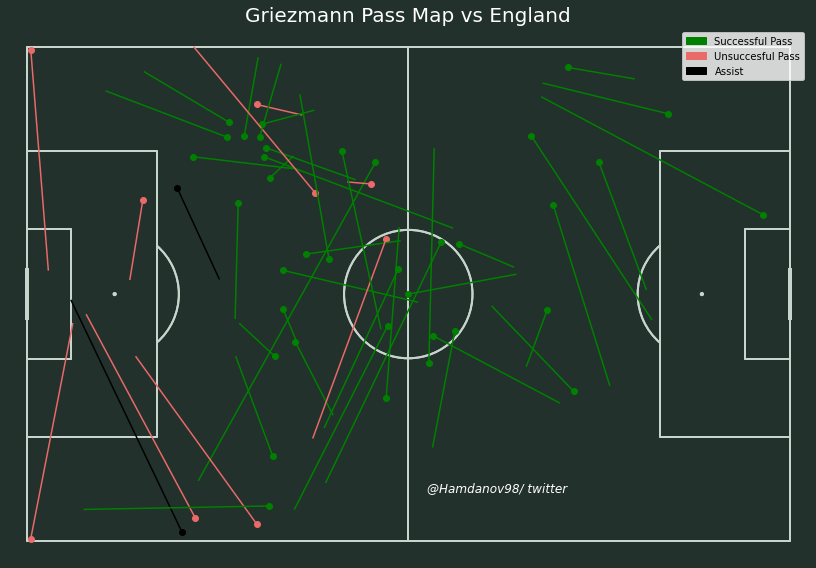

In [26]:
# Setup the pitch
pitch = Pitch(pitch_type='opta', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(13,8), constrained_layout=False, tight_layout=True)
fig.set_facecolor('#22312b')
#Draw the pitch on the ax figure as well as invert the axis for this specific pitch
pitch.draw(ax=ax)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
i=0
for i in range(len(messipasses)):
    if(messipasses.iloc[i].isAssist==True or messipasses.iloc[i].minute==16):
        plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='black')
        plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='black')
    else:
        if(messipasses.iloc[i].outcomeType=='Successful'):
            plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='green')
            plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='green')
        else:
            plt.plot((messipasses.iloc[i]['x'],messipasses.iloc[i]['endX']),(messipasses.iloc[i]['y'],messipasses.iloc[i]['endY']),color='#ea6969')
            plt.scatter(messipasses.iloc[i]['x'],messipasses.iloc[i]['y'],color='#ea6969')
   
   
green_patch=mpatches.Patch(color='green',label='Successful Pass')
red_patch = mpatches.Patch(color='#ea6969', label='Unsuccesful Pass')
black_patch = mpatches.Patch(color='black', label='Assist')
ax.legend(handles=[green_patch,red_patch,black_patch])   
plt.title('Griezmann Pass Map vs England',color='white',size=20)



fig.text(.52,.14,f'@Hamdanov98/ twitter',fontstyle='italic',fontsize=12,fontfamily='Andale Mono',color=text_color)


plt.savefig('pics/GrizouEngPass.png',dpi=300,bbox_inches = 'tight',facecolor='#22312b')